
Logistic Regression
Accuracy: 0.7874911158493249
Recall: 0.516042780748663
ROC-AUC: 0.8319235288940887

Random Forest
Accuracy: 0.7853589196872779
Recall: 0.45454545454545453
ROC-AUC: 0.8191602259138276

XGBoost
Accuracy: 0.7633262260127932
Recall: 0.47058823529411764
ROC-AUC: 0.8096906367933074


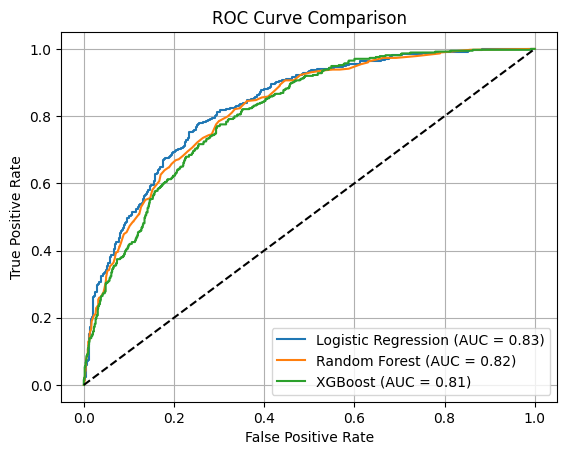

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Drop customerID and clean TotalCharges
df.drop("customerID", axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", np.nan), errors='coerce')
df.dropna(inplace=True)

# Binary encoding
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0})

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Train-test split
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    probs = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Recall:", classification_report(y_test, preds, output_dict=True)['1']['recall'])
    print("ROC-AUC:", roc_auc_score(y_test, probs))

    # Optional: ROC Curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, probs):.2f})")

# Show ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
